Import necessary dictionaries 

In [201]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy  as np
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

Upload the data

In [202]:
df=pd.read_csv('hotel_bookings.csv')

Now, let's check our data

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


The dataset has 119390 rows and 32 columns:
hotel: The names of the hotel are City Hotel and Resort Hotel

is_canceled: Boolean value stored as int64, indicates the hotel is canceled or not

lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
arrival_date: Information of the arrival date

stay in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
stay in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults/ children/ babies: Number of adults/ children/ babies

is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)

deposit_type : No deposit, Non Refund, and Refundable are the types of deposits

previous_cancellations : Is customer canceled (1) or not(0) before

In [204]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Now, let's see percentages of null values.

In [205]:
for col in df.columns:
    percentage_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percentage_missing))

hotel - 0.0%
is_canceled - 0.0%
lead_time - 0.0%
arrival_date_year - 0.0%
arrival_date_month - 0.0%
arrival_date_week_number - 0.0%
arrival_date_day_of_month - 0.0%
stays_in_weekend_nights - 0.0%
stays_in_week_nights - 0.0%
adults - 0.0%
children - 3.350364352123293e-05%
babies - 0.0%
meal - 0.0%
country - 0.004087444509590418%
market_segment - 0.0%
distribution_channel - 0.0%
is_repeated_guest - 0.0%
previous_cancellations - 0.0%
previous_bookings_not_canceled - 0.0%
reserved_room_type - 0.0%
assigned_room_type - 0.0%
booking_changes - 0.0%
deposit_type - 0.0%
agent - 0.13686238378423654%
company - 0.943068933746545%
days_in_waiting_list - 0.0%
customer_type - 0.0%
adr - 0.0%
required_car_parking_spaces - 0.0%
total_of_special_requests - 0.0%
reservation_status - 0.0%
reservation_status_date - 0.0%


It seems company column has a lot of missing values. Agent column is also has a bunch of missing. But overall we have pretty complete dataset. 

In [208]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Canceled counts

In [209]:
df.value_counts('is_canceled')

is_canceled
0    75166
1    44224
dtype: int64

Percentage of canceled reservation

In [210]:
percentage=df.value_counts('is_canceled',normalize=True).round(decimals=2)
print(percentage)

is_canceled
0    0.63
1    0.37
dtype: float64


Overall 37% of reservation is canceled.

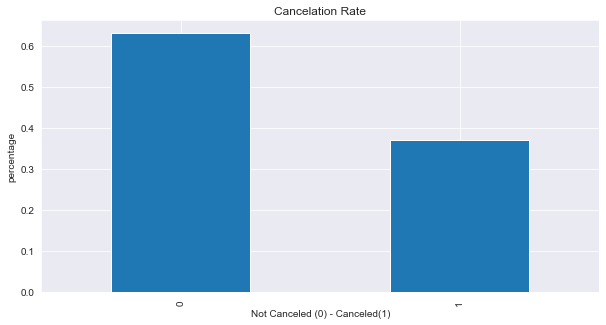

In [211]:
fig = plt.figure(figsize = (10, 5))
percentage.plot(kind='bar',title='Cancelation Rate',xlabel=('Not Canceled (0) - Canceled(1)'),ylabel=('percentage'))

plt.show()


37% overall cancelation rate is quite high. So I will try to figure out what might be reason of this. 

Hotel Types

In [212]:
np.unique(df['hotel'])

array(['City Hotel', 'Resort Hotel'], dtype=object)

There is two type of hotel, City and Resort.

In [213]:
df_hoteltypes=df.value_counts('hotel')
print(df_hoteltypes)

hotel
City Hotel      79330
Resort Hotel    40060
dtype: int64


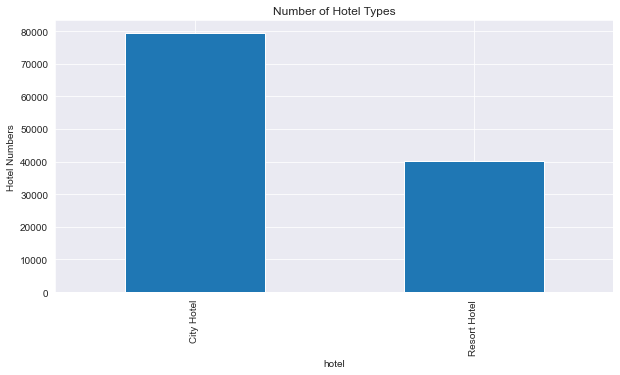

In [349]:
fig = plt.figure(figsize = (10, 5))
df_hoteltypes.plot(kind='bar',title='Number of Hotel Types')
plt.ylabel('Hotel Numbers')
plt.show()

My dataset has almost 80000 City hotel while Resort hotel number is 40000

In [215]:
con1=df[df['is_canceled']==1]

This is the dataframe for all canceled observations.

# Canceled reservations by hotel types

In [216]:
con2=con1.groupby('hotel')['is_canceled'].count()
print(con2)

hotel
City Hotel      33102
Resort Hotel    11122
Name: is_canceled, dtype: int64


<AxesSubplot:title={'center':'Numbers of Reservation Canceled by Hotel Type'}, xlabel='Hotel Type', ylabel='Canceled Reservation'>

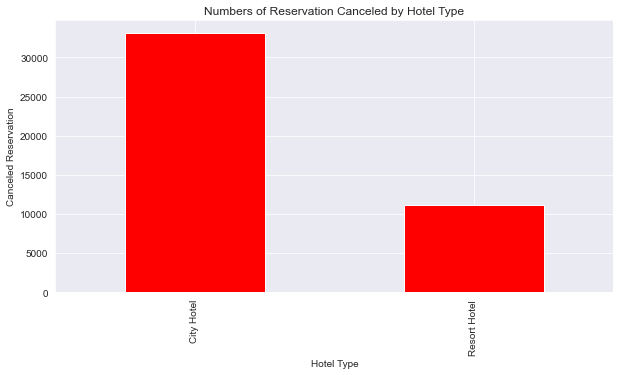

In [217]:
fig = plt.figure(figsize = (10, 5))
con2.plot(kind='bar',title='Numbers of Reservation Canceled by Hotel Type',ylabel='Canceled Reservation',xlabel='Hotel Type',color='r')


City Hotel has double of Resort hotel but City hotels cancelation numbers is almost triple of Resort hotel cancelation numbers. 
City Hotels(42%) have more cancelation problem than Resort Hotels(27%).

Let's Check cancelation trend over time

<AxesSubplot:title={'center':'Reservation Canceled for Years'}, xlabel='arrival_date_year', ylabel='Numbers of Cancelation'>

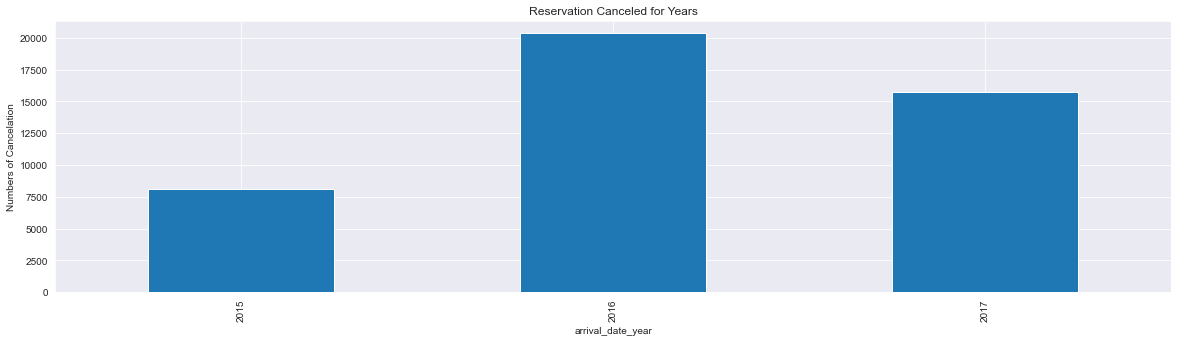

In [352]:
by_year=con1.groupby('arrival_date_year')['is_canceled'].count()
plt.ylabel('Numbers of Cancelation')
plt.title('Reservation Canceled for Years')
by_year.plot(kind='bar')

2016 has the biggest cancelation numbers. But this might be misleading so I check the numbers by months.

<AxesSubplot:title={'center':'Reservation Canceled for Months'}, xlabel='arrival_date_year,arrival_date_month', ylabel='Numbers of Cancelation'>

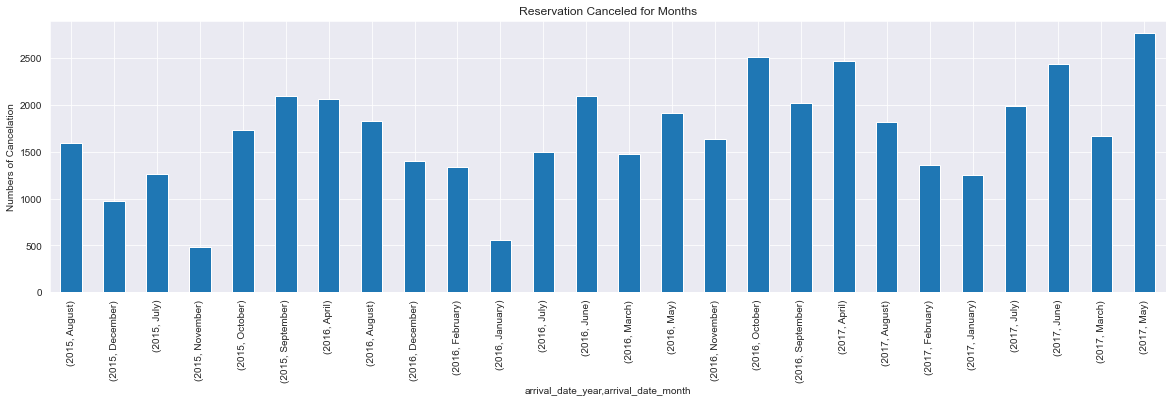

In [353]:
by_month=con1.groupby(['arrival_date_year','arrival_date_month'])['is_canceled'].count()
plt.ylabel('Numbers of Cancelation')
plt.title('Reservation Canceled for Months')
by_month.plot(kind='bar')

Cancelation over time shows November 2015 and January 2016 has the lowest cancelation while May 2017 has the highest cancelation number. 

# Lets check first having kids effect on cancelation.


babies  children
0       0.0         40961
        1.0          1546
        2.0          1528
        3.0            17
        10.0            1
1       0.0           131
        1.0            21
        2.0            13
2       0.0             2
Name: is_canceled, dtype: int64


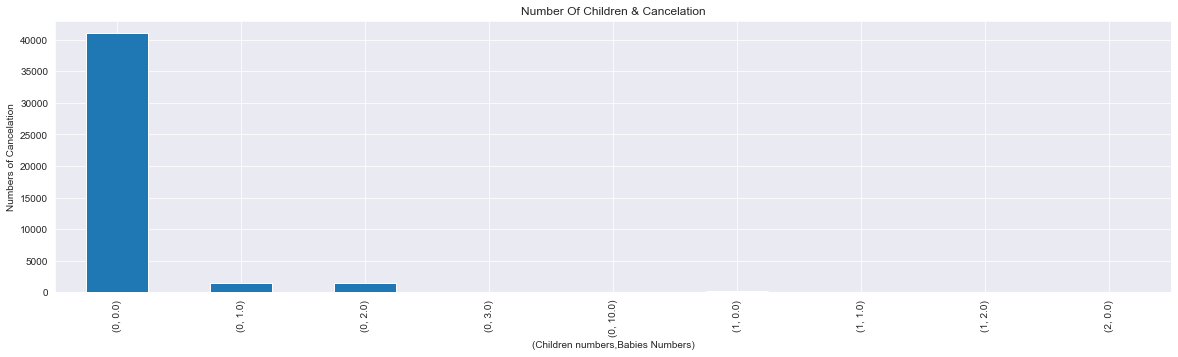

In [357]:
children_babies=con1.groupby(['babies','children'])['is_canceled'].count()
print(children_babies)
children_babies.plot(kind='bar')
plt.ylabel('Numbers of Cancelation')
plt.xlabel('(Children numbers,Babies Numbers)')
plt.title('Number Of Children & Cancelation')
plt.show()

Here I have guest without kids so I will filter my data for only parents with kids.

In [222]:
children_babies2=con1[con1['babies']>0]['is_canceled'].count()+ con1[con1['children']>0.0]['is_canceled'].count()
print('Number of Families with Children and Babies Canceled the Reservation: ')
print(children_babies2)

Number of Families with Children and Babies Canceled the Reservation: 
3293


In [359]:
children_babies3=df[df['babies']>0]['is_canceled'].count()+ df[df['children']>0.0]['is_canceled'].count()
print('All Families with Children and Babies is '+str(children_babies3))

All Families with Children and Babies is 9507


In [224]:
round(children_babies2/children_babies3,2)

0.35

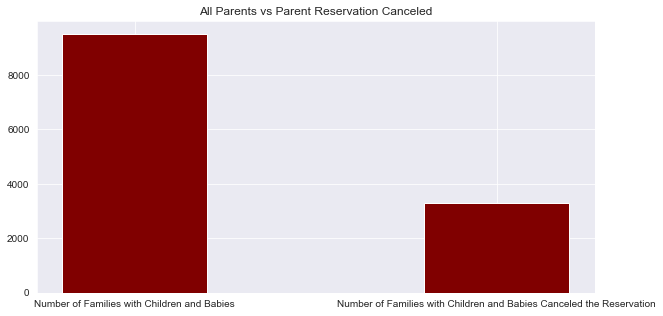

In [362]:
x=['Number of Families with Children and Babies','Number of Families with Children and Babies Canceled the Reservation']
y=[9507,3293]
fig = plt.figure(figsize = (10, 5))
 
plt.bar(x, y, color ='maroon',
        width = 0.4)
plt.title('All Parents vs Parent Reservation Canceled')
plt.show()

# While overall cancelation rate is 37%, families those have at least a baby or a child has 35% cancelation rate. This result disproves my assumption which claims families with children and/or babies have bigger cancelation rate.

Let's check deposit types

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
dtype: int64


Text(0.5, 1.0, 'Deposit Types on Cancelation')

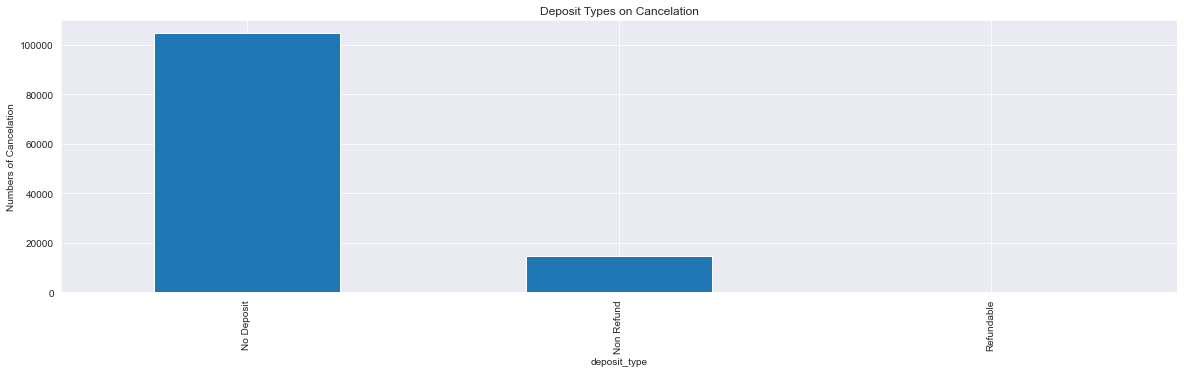

In [363]:
deposit_type=df.value_counts('deposit_type')

print(deposit_type)
deposit_type.plot(kind='bar')
plt.ylabel('Numbers of Cancelation')
plt.title('Deposit Types on Cancelation')

In [373]:
Deposit1=df['deposit_type']=='Non Refund'
Deposit2=df['deposit_type']=='Refundable'
Deposit_all=df[Deposit1|Deposit2]
Deposit_all['is_canceled'].count()
print('Deposit Payers Canceled the Reservation : '+str(Deposit_all['is_canceled'].count()))

Deposit Payers Canceled the Reservation : 14749


In [374]:
Deposit3=con1['deposit_type']=='Non Refund'
Deposit4=con1['deposit_type']=='Refundable'
Deposit_canceled=con1[Deposit3|Deposit4]
Deposit_canceled['is_canceled'].count()
print('All Deposit Payers : '+str(Deposit_canceled['is_canceled'].count()))

All Deposit Payers : 14530


In [375]:
print('Cancelation Rate for Deposit Payers : '+str(round(14530/14749,2)))

Cancelation Rate for Deposit Payers : 0.99


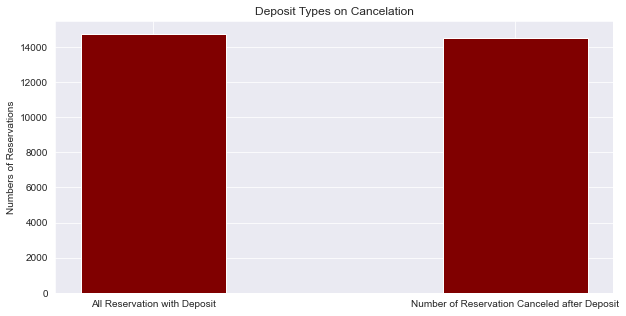

In [376]:
x=['All Reservation with Deposit','Number of Reservation Canceled after Deposit']
y=[14749,14530]
fig = plt.figure(figsize = (10, 5))
 
plt.bar(x, y, color ='maroon',
        width = 0.4)
plt.ylabel('Numbers of Reservations')
plt.title('Deposit Types on Cancelation')
plt.show()

# Interestingly 99% of deposit payers canceled their reservation. It is too far away from our assumption. 

Now let's see how much did royal customers cancel.

is_repeated_guest
0    115580
1      3810
dtype: int64


<AxesSubplot:title={'center':'Type of Repeated Guests'}, xlabel='is_repeated_guest', ylabel='Numbers of Reservations'>

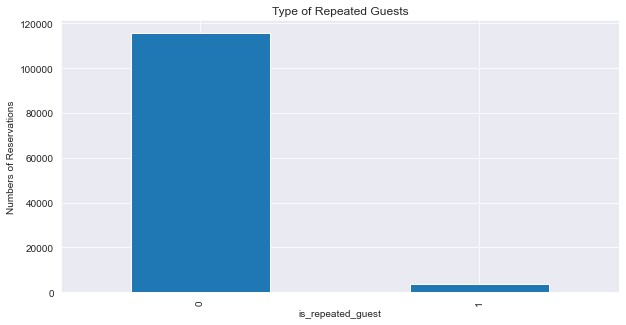

In [381]:
previous_custumer=df.value_counts('is_repeated_guest')
print(previous_custumer)
fig = plt.figure(figsize = (10, 5))
plt.ylabel('Numbers of Reservations')
plt.title('Type of Repeated Guests')
previous_custumer.plot(kind='bar')

In [377]:
customer1=df['is_repeated_guest']==1
customer_all=df[customer1]
print('All Loyal Customers : ' + str(customer_all['is_canceled'].count()))

All Loyal Customers : 3810


In [378]:
customer2=con1['is_repeated_guest']==1
customer_canceled=con1[customer2]
print('Reservation Canceler Loyal Customers : ' + str(customer_canceled['is_canceled'].count()))

Reservation Canceler Loyal Customers : 552


In [380]:
print('Reservation Cancelation Rate Amongs Loyal Customers : ' + str(round(552/3810,2)))

Reservation Cancelation Rate Amongs Loyal Customers : 0.14


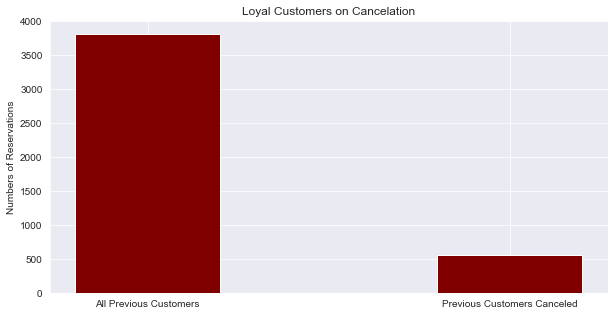

In [382]:
x=['All Previous Customers','Previous Customers Canceled']
y=[3810,552]
fig = plt.figure(figsize = (10, 5))
 
plt.bar(x, y, color ='maroon',
        width = 0.4)
plt.ylabel('Numbers of Reservations')
plt.title('Loyal Customers on Cancelation')
plt.show()

# 14% of loyal customers are canceled their reservation. Which is expected and better than overall cancelation rate (37%).

Now, let'see what did  do.

<AxesSubplot:title={'center':'Type of Previous Cancelation'}, xlabel='is_repeated_guest', ylabel='Numbers of Reservations'>

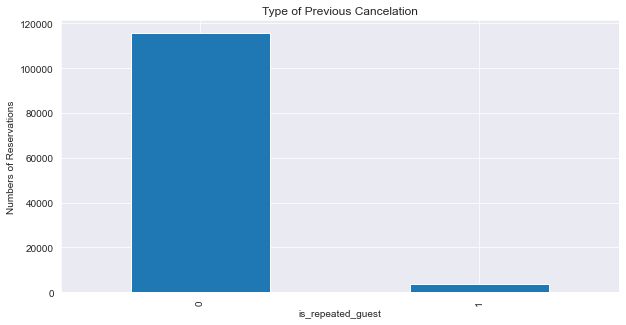

In [391]:
previous_cancelars=df.value_counts('previous_cancellations')
fig = plt.figure(figsize = (10, 5))
plt.ylabel('Numbers of Reservations')
plt.title('Type of Previous Cancelation')
previous_custumer.plot(kind='bar')

In [392]:
notloyal1=df['previous_cancellations']!=0
notloyal_all=df[notloyal1]
print('All Previous Cancelers : ' + str(notloyal_all['is_canceled'].count()))

All Previous Cancelers : 6484


In [393]:
notloyal2=con1['previous_cancellations']!=0
notloyal_canceled=con1[notloyal2]
print('Canceled Previous Cancelers : ' + str(notloyal_canceled['is_canceled'].count()))

Canceled Previous Cancelers : 5942


In [394]:
print('Rate of Cancelation : ' + str(round(5942/6482,2)))

Rate of Cancelation : 0.92


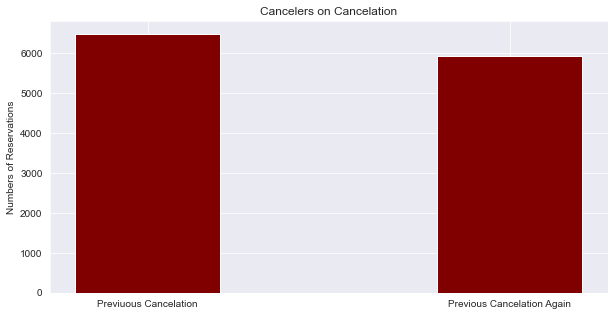

In [395]:
x=['Previuous Cancelation','Previous Cancelation Again']
y=[6482,5942]
fig = plt.figure(figsize = (10, 5))
 
plt.bar(x, y, color ='maroon',
        width = 0.4)
plt.ylabel('Numbers of Reservations')
plt.title('Cancelers on Cancelation')
plt.show()

# Not suprisigly 92% of previous cancelers have canceled again.

Let's check countries stats'

In [240]:
country=df.value_counts('country')
print(country)

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MLI        1
MMR        1
MRT        1
SMR        1
PYF        1
Length: 177, dtype: int64


Portugal, England, France, Spain and Germany are the countries our hotel place the most. So Let's see this 5 countries reservation cancelation numbers.

In [241]:
country1=df['country']=='PRT'
country2=df['country']=='GBR'
country3=df['country']=='FRA'
country4=df['country']=='ESP'
country5=df['country']=='DEU'
top5=df[country1|country2|country3|country4|country5]
top5.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


I filter my dataset for the 5 top countries. 

In [242]:
top_country=top5.value_counts('country')
print(top_country)

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
dtype: int64


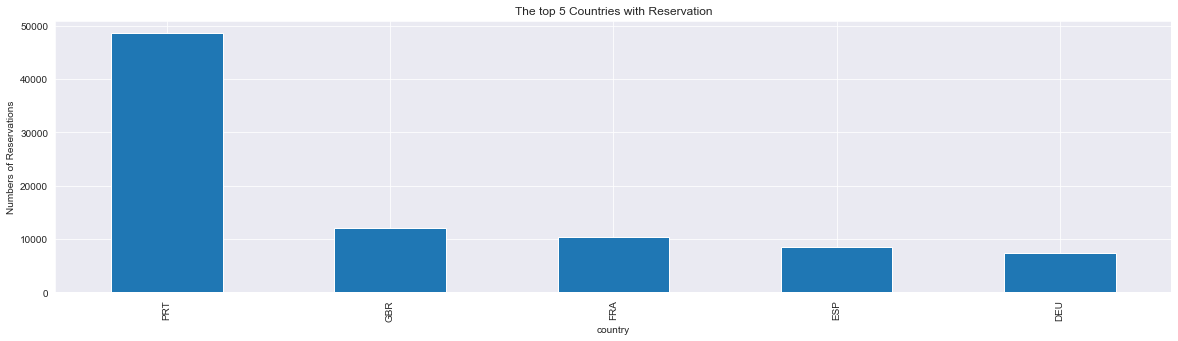

<Figure size 720x360 with 0 Axes>

In [401]:
top_country.plot(kind='bar',title='The top 5 Countries with Reservation',ylabel='Numbers of Reservations')
fig = plt.figure(figsize = (10, 5))

In [244]:
top5.groupby('country')['is_canceled'].sum().sort_values(ascending=False)

country
PRT    27519
GBR     2453
ESP     2177
FRA     1934
DEU     1218
Name: is_canceled, dtype: int64

In [245]:
print('Cancelation rate in Portugal: ' + str(round(27519/48590,2)))
print('Cancelation rate in England: ' + str(round(2453/12129,2)))
print('Cancelation rate in France: ' + str(round(1934/10415,2)))
print('Cancelation rate in Spain: ' + str(round(2177/8568,2)))
print('Cancelation rate in Germany: ' + str(round(1218/7287,2)))

Cancelation rate in Portugal: 0.57
Cancelation rate in England: 0.2
Cancelation rate in France: 0.19
Cancelation rate in Spain: 0.25
Cancelation rate in Germany: 0.17


# Portugal has higher cancelation rate (57%) than overall (37%) countries while other top 4 has lower rates than overall rate (37%)

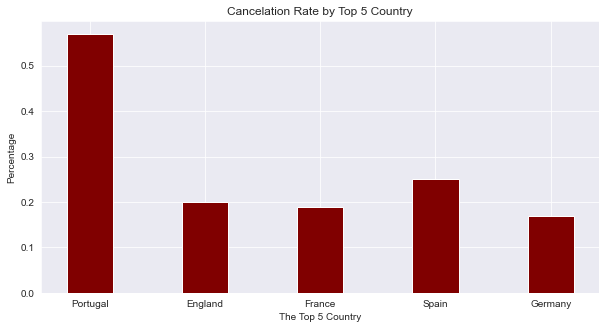

In [246]:
x=['Portugal','England','France','Spain','Germany']
y=[0.57,0.2,0.19,0.25,0.17]
fig = plt.figure(figsize = (10, 5))
 
plt.bar(x, y, color ='maroon',
        width = 0.4)
plt.title('Cancelation Rate by Top 5 Country')
plt.xlabel('The Top 5 Country')
plt.ylabel('Percentage')
plt.show()

# Let's check average hotel rates

In [403]:
print('Average Room Rate : '+str(df['adr'].mean()))

Average Rome Rate : 101.83112153446453


In [405]:
print('Average Room Rate when Reservation Canceled : '+str(con1['adr'].mean()))

Average Room Rate when Reservation Canceled : 104.96433316750777


In [406]:
Q1=df.quantile(.25)
Q3=df.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
Outliers=df[((df<lower_limit) | (df>upper_limit)).any(axis=1)]

C:\Users\gulsevgi\AppData\Local\Temp/ipykernel_3584/4187714461.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers=df[((df<lower_limit) | (df>upper_limit)).any(axis=1)]


Removed outliers to have the better picture of distrubutions. 

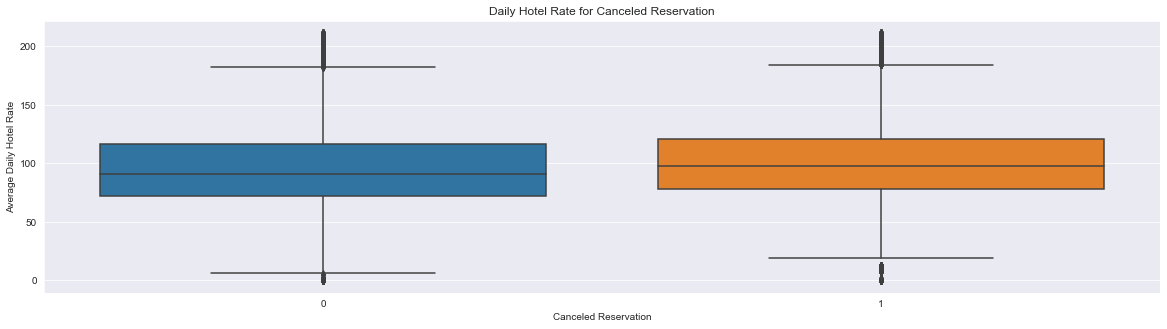

<Figure size 360x360 with 0 Axes>

In [407]:
sns.boxplot(x='is_canceled', y='adr',data=no_outliers)
plt.title('Daily Hotel Rate for Canceled Reservation')
plt.xlabel('Canceled Reservation')
plt.ylabel('Average Daily Hotel Rate')
fig = plt.figure(figsize = (5, 5))
plt.show()

Canceled reservation has little bit more daily room rate than not canceled ones. 

# Logistic Regression

The dataset has a lot of binary(0 and 1 or Yes/No type of data) variables. So logistic regression would be better to predict the reservation cancelation for the given variables. 

In [254]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

(119390, 32)

I need to drop some columns which are unrelavent and drop the missing rows.

In [273]:
df_reg=df.drop(['meal', 'country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','booking_changes','agent','company','days_in_waiting_list','reservation_status_date'], axis=1)
df_reg2=df_reg.dropna()
df_reg.shape , df_reg2.shape

((119390, 21), (119386, 21))

In [274]:
df_reg2.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
deposit_type                       object
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                 object
dtype: object

In [ ]:
These columns will be the variables

Create dummy variables
That is variables with only two values, zero and one.

In [275]:
cat_vars=['hotel','arrival_date_month','deposit_type','customer_type','reservation_status']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_reg2[var], prefix=var)
    data1=df_reg2.join(cat_list)
    df_reg2=data1
cat_vars=['hotel','arrival_date_month','deposit_type','customer_type','reservation_status']
data_vars=df_reg2.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

My final data columns will be:

In [276]:
data_final=df_reg2[to_keep]
data_final.columns.values

array(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'hotel_City Hotel', 'hotel_Resort Hotel',
       'arrival_date_month_April', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       'arrival_date_month_October', 'arrival_date_month_September',
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
  

In [277]:
#start !pip install -U imbalanced-learn 

Over-sampling using SMOTE
With my training data created, I’ll up-sample the is_canceled using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (is_canceled) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
We are going to implement SMOTE in Python.

In [278]:
X = data_final.loc[:, data_final.columns != 'is_canceled']
y = data_final.loc[:, data_final.columns == 'is_canceled']

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['is_canceled'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of not canceled in oversampled data",len(os_data_y[os_data_y['is_canceled']==0]))
print("Number of subscription",len(os_data_y[os_data_y['is_canceled']==1]))
print("Proportion of not canceled data in oversampled data is ",len(os_data_y[os_data_y['is_canceled']==0])/len(os_data_X))
print("Proportion of canceled data in oversampled data is ",len(os_data_y[os_data_y['is_canceled']==1])/len(os_data_X))

length of oversampled data is  105514
Number of not canceled in oversampled data 52757
Number of subscription 52757
Proportion of not canceled data in oversampled data is  0.5
Proportion of canceled data in oversampled data is  0.5


In [ ]:
Now we have a perfect balanced data

Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [281]:
data_final_vars=data_final.columns.values.tolist()
y=['is_canceled']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\gulsevgi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gulsevgi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[False False False False False False False False False  True False False
 False  True  True  True  True  True  True False False False  True  True
 False  True False  True  True  True  True False  True False False  True
  True  True  True]
[21 20 15 14 13 16  8 10 12  1  4  7 19  1  1  1  1  1  1  2  9  5  1  1
 18  1  3  1  1  1  1 17  1 11  6  1  1  1  1]


The process above(RFE) helped to select the following variables for the model

In [322]:
cols=['is_repeated_guest','required_car_parking_spaces', 'total_of_special_requests','hotel_City Hotel', 'hotel_Resort Hotel',
       'arrival_date_month_April', 'arrival_date_month_August',
       'arrival_date_month_July',
       'arrival_date_month_June',
       'arrival_date_month_May', 
       'arrival_date_month_October', 'arrival_date_month_September',
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
        'customer_type_Contract',
       'customer_type_Transient-Party', 'reservation_status_Canceled'] 
X=os_data_X[cols]
y=os_data_y['is_canceled']

In [323]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.061621
         Iterations: 35
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.911     
Dependent Variable:         is_canceled            AIC:                    13037.6937
Date:                       2022-05-23 20:46       BIC:                    13200.3259
No. Observations:           105514                 Log-Likelihood:         -6501.8   
Df Model:                   16                     LL-Null:                -73137.   
Df Residuals:               105497                 LLR p-value:            0.0000    
Converged:                  0.0000                 Scale:                  1.0000    
No. Iterations:             35.0000                                                  
-------------------------------------------------------------------------------------
                               Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
------------------------

C:\Users\gulsevgi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


There are some variables with p values greater than 0.05 so I will take them out.

In [341]:
cols=['is_repeated_guest', 'total_of_special_requests','hotel_City Hotel', 'hotel_Resort Hotel',
        'arrival_date_month_August',
       'arrival_date_month_July',
       'arrival_date_month_October', 'arrival_date_month_September',
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
        'customer_type_Contract',
       'customer_type_Transient-Party'] 
X=os_data_X[cols]
y=os_data_y['is_canceled']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.522479
         Iterations 10
                                Results: Logit
Model:                  Logit                Pseudo R-squared:     0.246      
Dependent Variable:     is_canceled          AIC:                  110281.6404
Date:                   2022-05-25 20:18     BIC:                  110396.4396
No. Observations:       105514               Log-Likelihood:       -55129.    
Df Model:               11                   LL-Null:              -73137.    
Df Residuals:           105502               LLR p-value:          0.0000     
Converged:              1.0000               Scale:                1.0000     
No. Iterations:         10.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------

So now, I have variables with god p-values

In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Predicting the test set results and calculating the accuracy

In [343]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.72


Confusion Matrix

In [344]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13329  2448]
 [ 6346  9532]]


13329 + 9532 is correct predictions and 2448+6346 is incorrect predictions have made by the model. 

Compute precision, recall, F-measure and support

To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [345]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75     15777
           1       0.80      0.60      0.68     15878

    accuracy                           0.72     31655
   macro avg       0.74      0.72      0.72     31655
weighted avg       0.74      0.72      0.72     31655



Interpretation: Of the whole test set, 72% of the prediction are accurate. The model predict the 72% of the customer will cancel or not calcel the reservations.

In [ ]:
ROC Curve

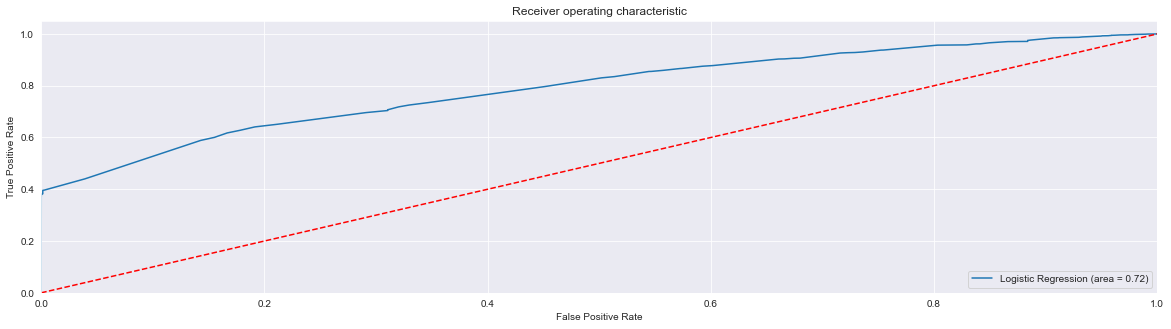

In [346]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# linear regression

In the data set, I have some numerical variables and I will try linear regression with them.

<AxesSubplot:>

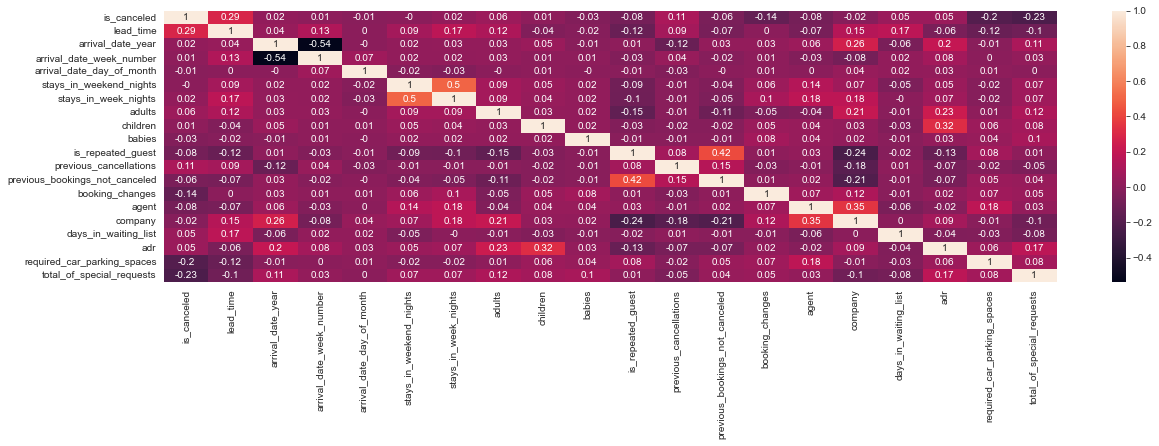

In [118]:
sns.heatmap(heatmap1,annot=True)

In [117]:
heatmap1=df.corr(method='pearson').round(decimals=2)
print(heatmap1)

                                is_canceled  lead_time  arrival_date_year  \
is_canceled                            1.00       0.29               0.02   
lead_time                              0.29       1.00               0.04   
arrival_date_year                      0.02       0.04               1.00   
arrival_date_week_number               0.01       0.13              -0.54   
arrival_date_day_of_month             -0.01       0.00              -0.00   
stays_in_weekend_nights               -0.00       0.09               0.02   
stays_in_week_nights                   0.02       0.17               0.03   
adults                                 0.06       0.12               0.03   
children                               0.01      -0.04               0.05   
babies                                -0.03      -0.02              -0.01   
is_repeated_guest                     -0.08      -0.12               0.01   
previous_cancellations                 0.11       0.09              -0.12   

In [411]:
corr_pairs=heatmap1.unstack()
hig_corr=corr_pairs[corr_pairs>0.3].sort_values()
hig_corr

adr                             children                          0.32
children                        adr                               0.32
company                         agent                             0.35
agent                           company                           0.35
previous_bookings_not_canceled  is_repeated_guest                 0.42
is_repeated_guest               previous_bookings_not_canceled    0.42
stays_in_weekend_nights         stays_in_week_nights              0.50
stays_in_week_nights            stays_in_weekend_nights           0.50
is_canceled                     is_canceled                       1.00
adr                             adr                               1.00
days_in_waiting_list            days_in_waiting_list              1.00
company                         company                           1.00
agent                           agent                             1.00
booking_changes                 booking_changes                   1.00
previo

Heatmap and correlation coeffient table shows daily rate and children number have some correlation. 
Let's try the regression line by using them.

In [429]:
dataframe_ra=pd.read_csv('hotel_bookings.csv')
dataframe_raw=dataframe_ra.dropna()
independent_variables=dataframe_raw['children']
independent_variables = sm.add_constant(independent_variables)
dependent_variables=dataframe_raw['adr']
regression_model = sm.OLS(dependent_variables,independent_variables).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    adr   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     40.24
Date:                Fri, 27 May 2022   Prob (F-statistic):           1.30e-09
Time:                        11:47:24   Log-Likelihood:                -1082.8
No. Observations:                 217   AIC:                             2170.
Df Residuals:                     215   BIC:                             2176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.3523      2.455     24.993      0.000      56.514      66.191
children      66.2235     10.439      6.344      0.000      45.648      86.799
==============================================================================
Omnibus:                       68.387   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.402
Skew:                           1.392   Prob(JB):                     1.82e-39
Kurtosis:                       6.461   Cond. No.                         4.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value is good but r-squared in not much good

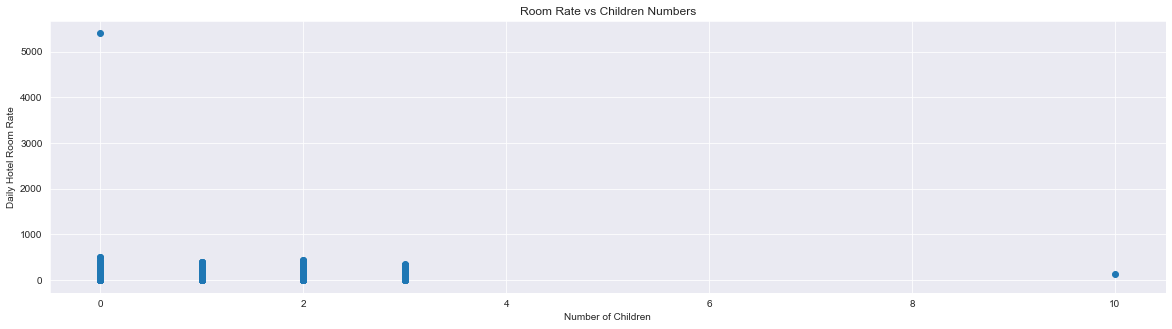

In [416]:
plt.scatter(x=df['children'],y=df['adr'])
plt.xlabel('Number of Children')
plt.ylabel('Daily Hotel Room Rate')
plt.title('Room Rate vs Children Numbers')
plt.show()

Text(0.5, 1.0, 'Room Rate vs Children Numbers')

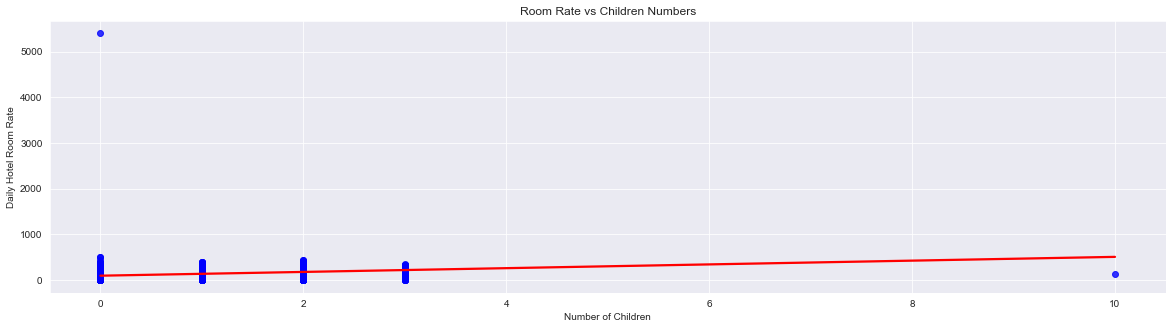

In [417]:
sns.regplot(x='children',y='adr',data=df, scatter_kws={'color':'blue'}, line_kws={'color':"red"})
plt.xlabel('Number of Children')
plt.ylabel('Daily Hotel Room Rate')
plt.title('Room Rate vs Children Numbers')

Here is the linear regression line for my dateset.